<a href="https://colab.research.google.com/github/ELiTE0005/NNML-algorithms/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Evaluation Results:
Accuracy: 0.8097
Confusion Matrix:


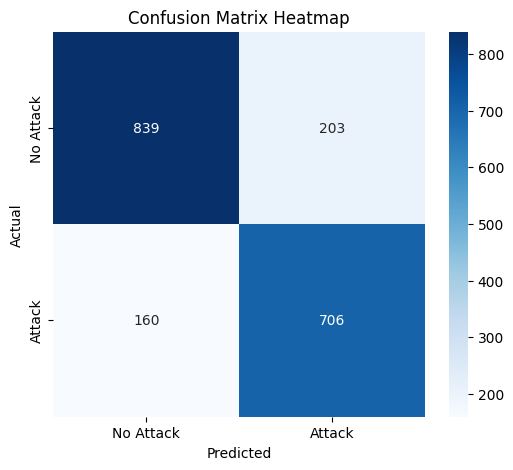

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1042
           1       0.78      0.82      0.80       866

    accuracy                           0.81      1908
   macro avg       0.81      0.81      0.81      1908
weighted avg       0.81      0.81      0.81      1908



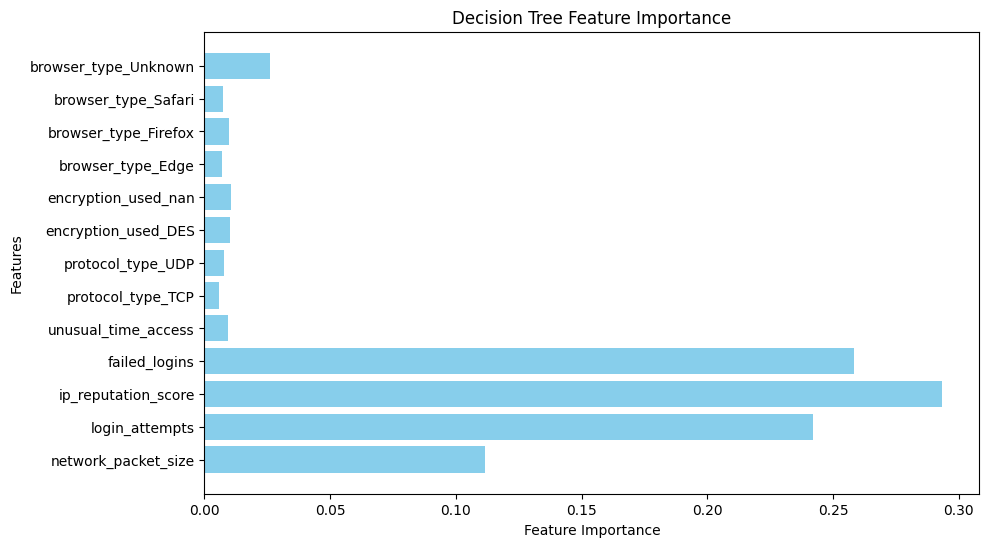

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
file_path = "cybersecurity_intrusion_data.csv"
df = pd.read_csv(file_path)

# Selecting numerical and categorical features
num_features = ['network_packet_size', 'login_attempts', 'ip_reputation_score', 'failed_logins', 'unusual_time_access']
cat_features = ['protocol_type', 'encryption_used', 'browser_type']
target = 'attack_detected'

# One-hot encode categorical variables
ohe = OneHotEncoder(drop='first', sparse_output=False)
ohe_encoded = ohe.fit_transform(df[cat_features])
ohe_feature_names = ohe.get_feature_names_out(cat_features)

df_encoded = pd.DataFrame(ohe_encoded, columns=ohe_feature_names)

# Standardizing numerical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[num_features]), columns=num_features)

# Combining encoded categorical and scaled numerical data
X = pd.concat([df_scaled, df_encoded], axis=1)
y = df[target]

# Splitting dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Evaluation Results:")
print(f"Accuracy: {accuracy:.4f}")
import seaborn as sns

print("Confusion Matrix:")
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attack', 'Attack'], yticklabels=['No Attack', 'Attack'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print("Classification Report:")
print(class_report)

# Feature Importance Plot
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Decision Tree Feature Importance")
plt.show()


Accuracy: 0.8852, Precision: 0.9641, Recall: 0.7760, F1-score: 0.8599


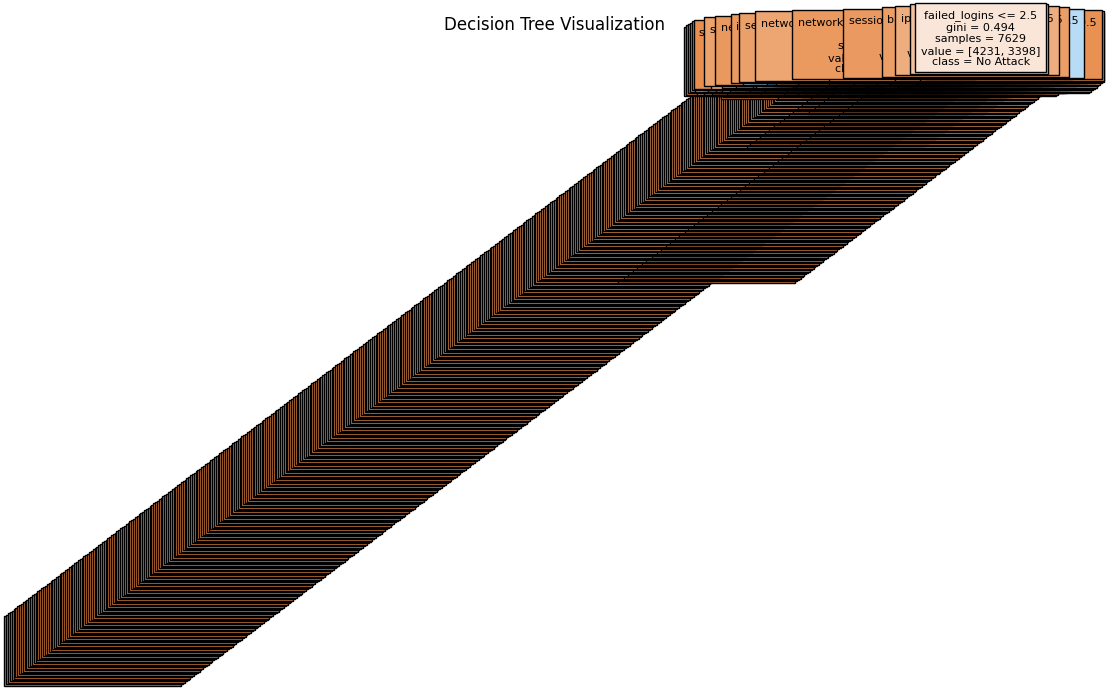

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load dataset
file_path = "cybersecurity_intrusion_data.csv"
df = pd.read_csv(file_path)

# Selecting features and target
X = df.drop(columns=["attack_detected"])
y = df["attack_detected"]

# Converting categorical features to numerical
X = pd.get_dummies(X, drop_first=True)

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# One-line evaluation summary
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}, Precision: {precision_score(y_test, y_pred):.4f}, Recall: {recall_score(y_test, y_pred):.4f}, F1-score: {f1_score(y_test, y_pred):.4f}")

# Decision Tree Plot
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=["No Attack", "Attack"], filled=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()



Accuracy: 0.8125, Precision: 0.8889, Recall: 0.8000, F1-score: 0.8421


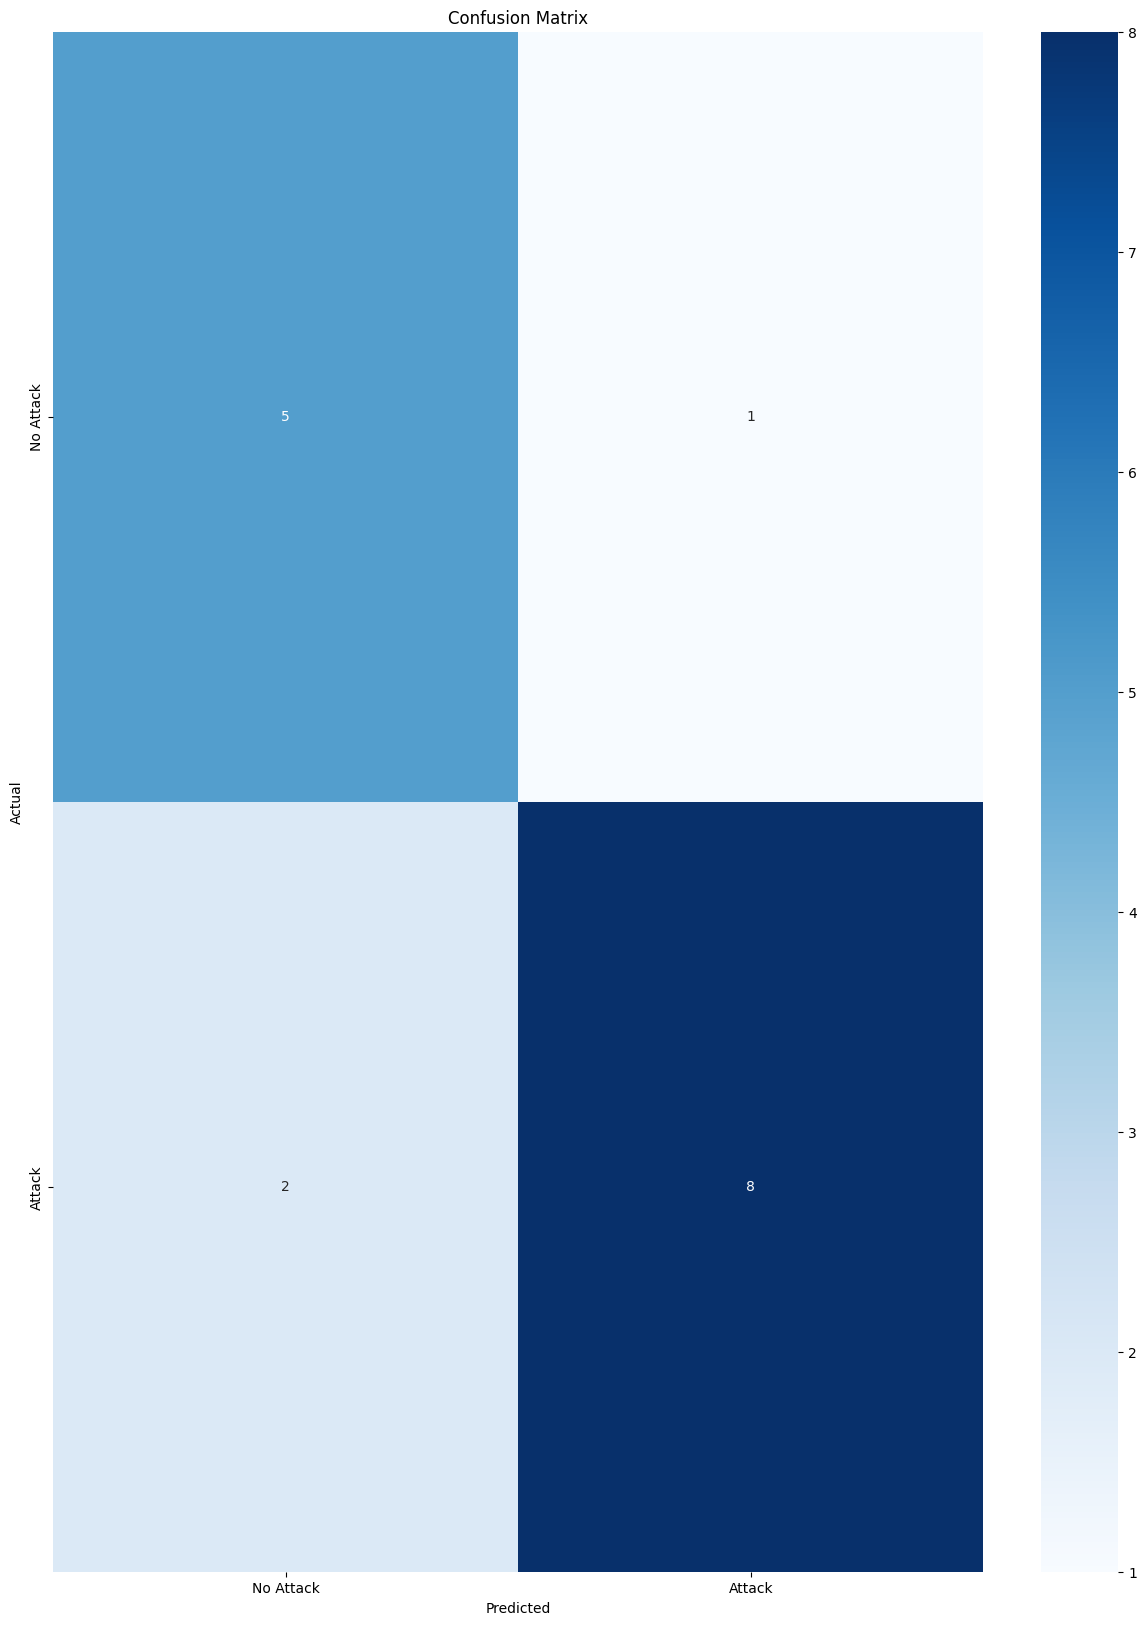

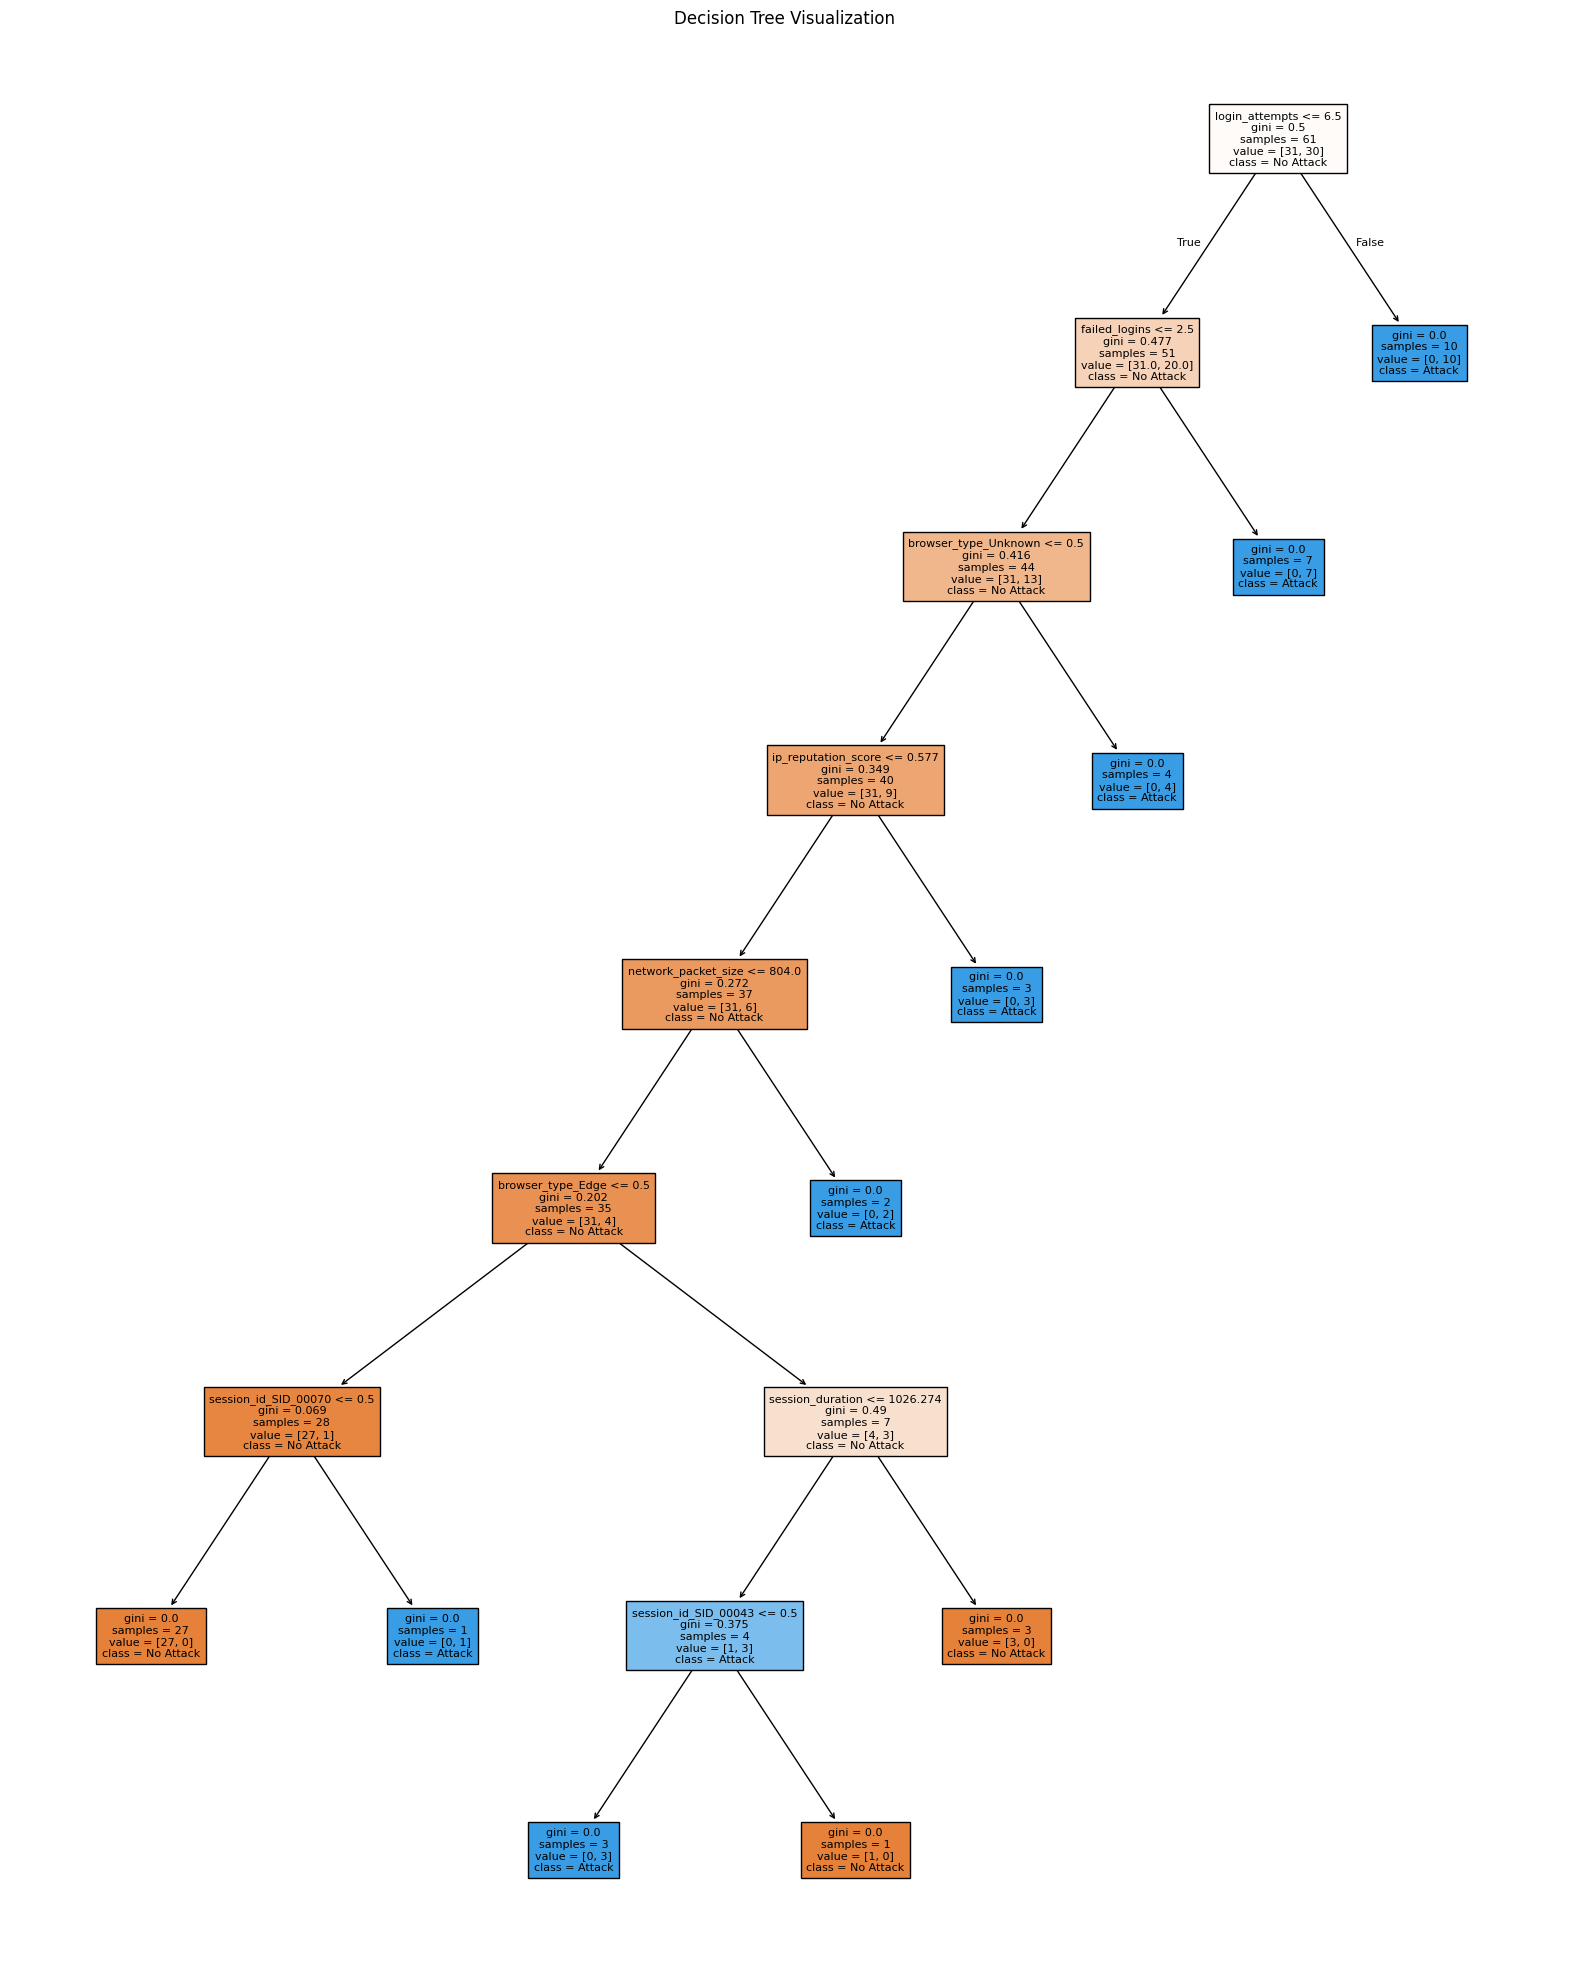

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load dataset (taking only the top 100 rows)
file_path = "cybersecurity_intrusion_data.csv"
df = pd.read_csv(file_path).head(77)

# Selecting features and target
X = df.drop(columns=["attack_detected"])
y = df["attack_detected"]

# Converting categorical features to numerical
X = pd.get_dummies(X, drop_first=True)

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# One-line evaluation summary
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}, Precision: {precision_score(y_test, y_pred):.4f}, Recall: {recall_score(y_test, y_pred):.4f}, F1-score: {f1_score(y_test, y_pred):.4f}")

# Confusion Matrix Plot
plt.figure(figsize=(15, 20))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Attack", "Attack"], yticklabels=["No Attack", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Decision Tree Plot
plt.figure(figsize=(20, 25))
plot_tree(model, feature_names=X.columns, class_names=["No Attack", "Attack"], filled=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()





# TP: 8
# FP: 1
# ​

# FN: 2
# TN: 5
# ​
